In [2]:
import sys
sys.path.append("../../")
import numpy as np
import pandas as pd
from fomo.patterns.missing_data_matrix import missing_data_matrix, flag_missing_data
from fomo.patterns.missing_pattern_plot import MissingPatternPlot
from fomo.patterns.cluster_k_means import Cluster_KMeans
from fomo.patterns.cluster_dtw_k_means import Cluster_DTW_KMeans

In [3]:
heart_rate_data = pd.read_csv('../../sample data/Four_Cluster_Missingness_30_days.csv')
heart_rate_data = heart_rate_data.drop('Unnamed: 0', axis=1)
print(heart_rate_data)



        person_id                    datetime  heart_rate
0          924197  2024-01-01 00:00:56.000000          79
1          924197  2024-01-01 00:01:22.000000          75
2          924197  2024-01-01 00:03:25.000000          91
3          924197  2024-01-01 00:06:25.000000          88
4          924197  2024-01-01 00:50:11.736950          85
...           ...                         ...         ...
219532     273148  2024-01-30 23:18:56.809130          63
219533     273148  2024-01-30 23:54:02.265306          60
219534     273148  2024-01-30 23:55:07.265306          69
219535     273148  2024-01-30 23:57:27.265306          92
219536     273148  2024-01-30 23:59:06.265306          71

[219537 rows x 3 columns]


In [4]:
flagged_data = flag_missing_data(heart_rate_data, 'heart_rate')
print(flagged_data)

        person_id            datetime  heart_rate  Missing_Flag
0          924197 2024-01-01 00:00:00   83.250000         False
1          924197 2024-01-01 00:15:00         NaN          True
2          924197 2024-01-01 00:30:00         NaN          True
3          924197 2024-01-01 00:45:00   80.750000         False
4          924197 2024-01-01 01:00:00   91.333333         False
...           ...                 ...         ...           ...
138235     273148 2024-01-30 22:45:00         NaN          True
138236     273148 2024-01-30 23:00:00         NaN          True
138237     273148 2024-01-30 23:15:00   63.000000         False
138238     273148 2024-01-30 23:30:00         NaN          True
138239     273148 2024-01-30 23:45:00         NaN          True

[138240 rows x 4 columns]


In [5]:
my_missing_data_matrix = missing_data_matrix(flagged_data, missingness_interval=15*4*24)
print(my_missing_data_matrix)

datetime   2024-01-01 23:45:00  2024-01-02 23:45:00  2024-01-03 23:45:00  \
person_id                                                                  
102475                0.364583             0.395833             0.270833   
118675                0.281250             0.270833             0.312500   
140937                0.302083             0.270833             1.000000   
142237                0.416667             0.333333             0.281250   
165878                0.302083             0.395833             1.000000   
176588                1.000000             0.260417             0.395833   
187821                0.302083             0.281250             0.343750   
225284                1.000000             0.250000             0.322917   
225295                1.000000             0.343750             0.239583   
273148                1.000000             1.000000             0.208333   
301108                0.281250             0.354167             0.364583   
302361      

/Users/harrisonkane/Desktop/BME/Bass Connections/FOMO/fomo/examples/../../fomo/patterns/missing_data_matrix.py:41: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  resampled_matrix = matrix.rolling(window=intervals_per_group, axis=1, min_periods=1).mean()


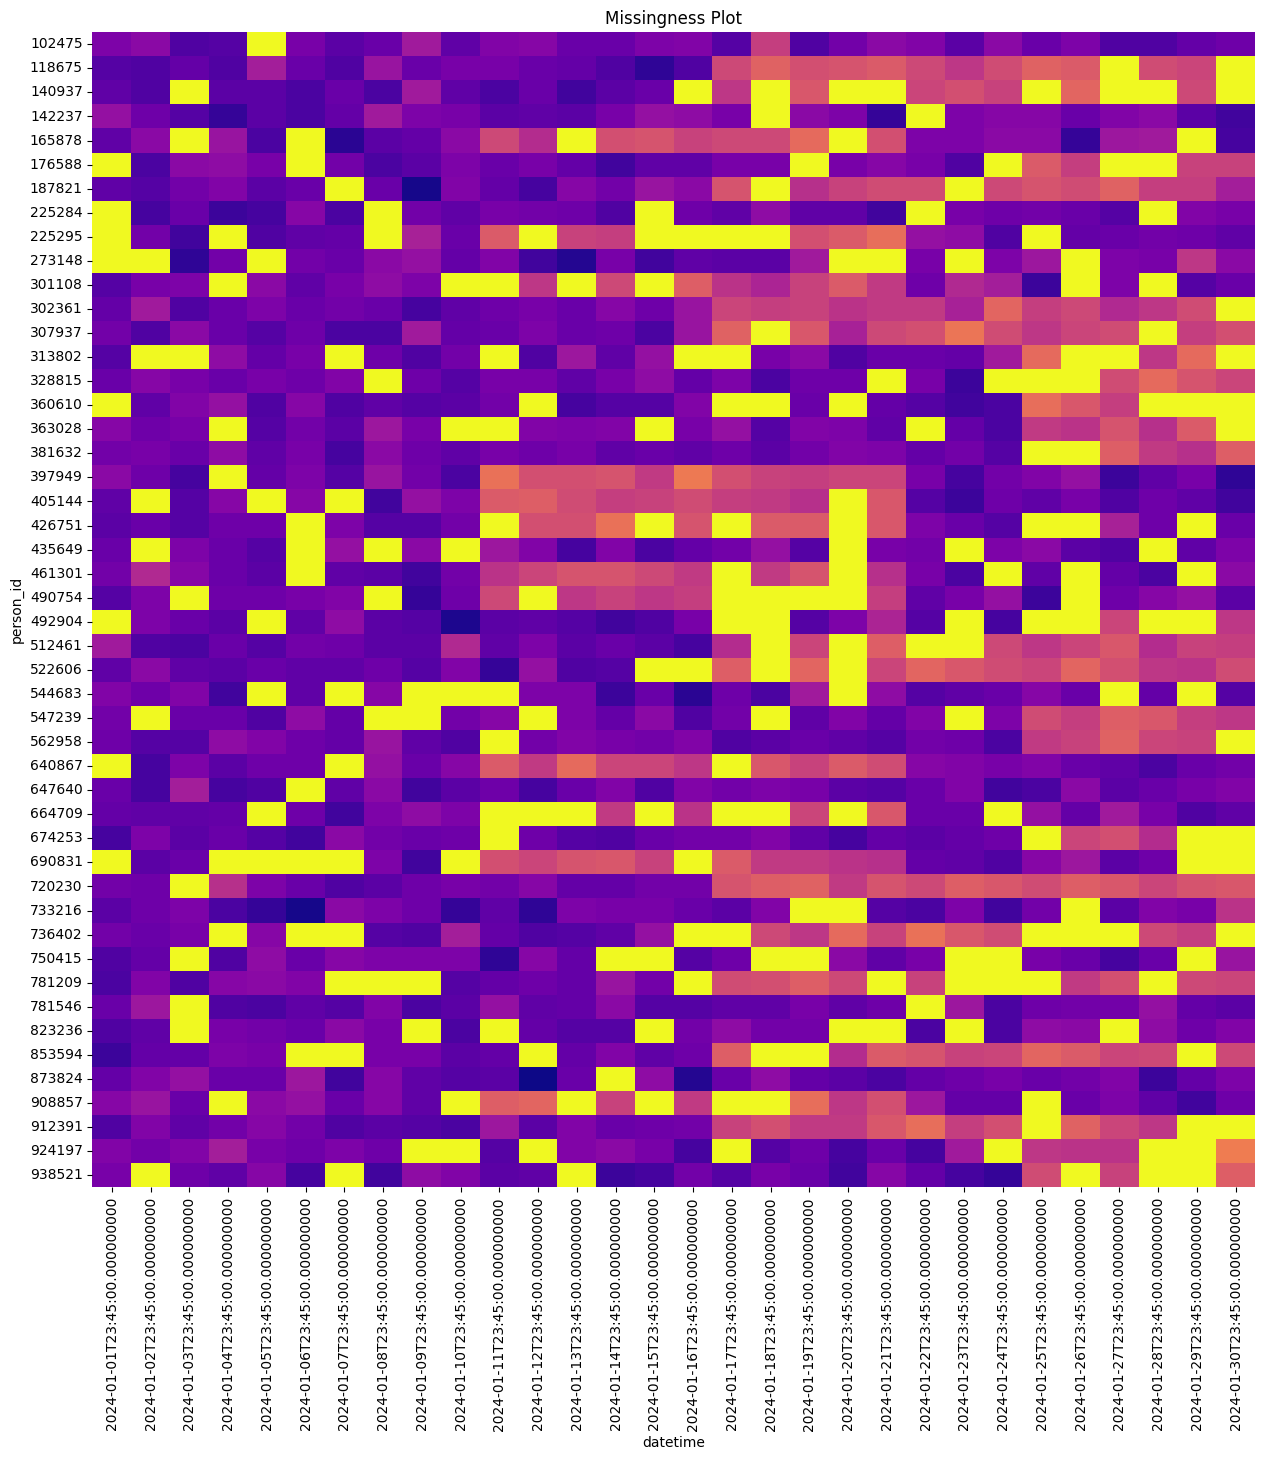

In [6]:
plot_data = MissingPatternPlot(my_missing_data_matrix, None, 'study_period', None)
plot_data.plot('person_id', direction=True, x_ticks='auto', y_ticks=True)

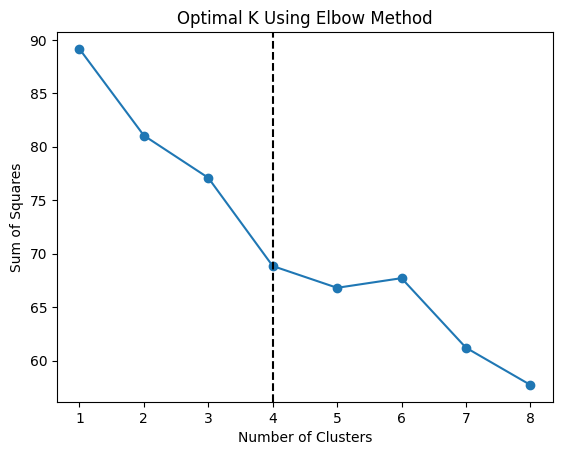

optimal_k 4


In [7]:
cluster_k = Cluster_KMeans(None)
optimal_k = cluster_k.find_n_clusters(my_missing_data_matrix, clusters=np.arange(1,9), method='elbow')

print("optimal_k", optimal_k)

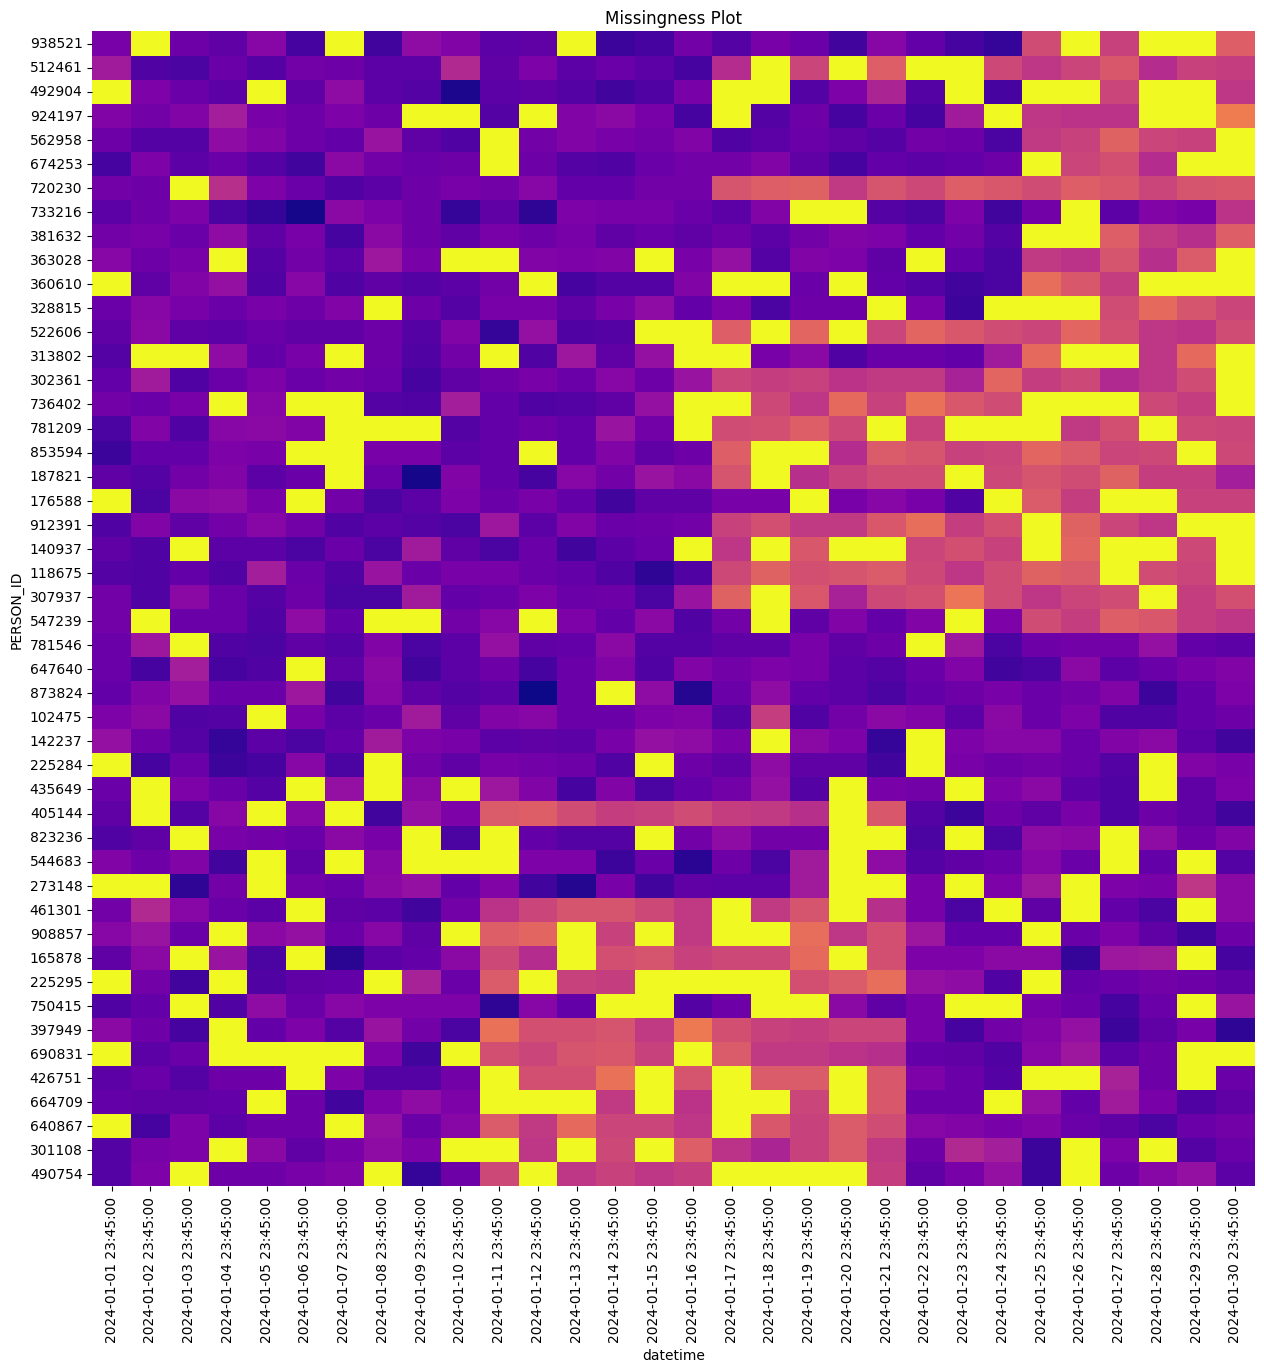

In [8]:
kmeans = Cluster_KMeans(n_clusters=optimal_k)
kmeans.fit(my_missing_data_matrix)
clusters = kmeans.labels_

plot_data = MissingPatternPlot.initialize(my_missing_data_matrix, None, 'study_period', clusters)
plot_data.plot('cluster', direction=False, y_label='PERSON_ID', y_ticks=True)

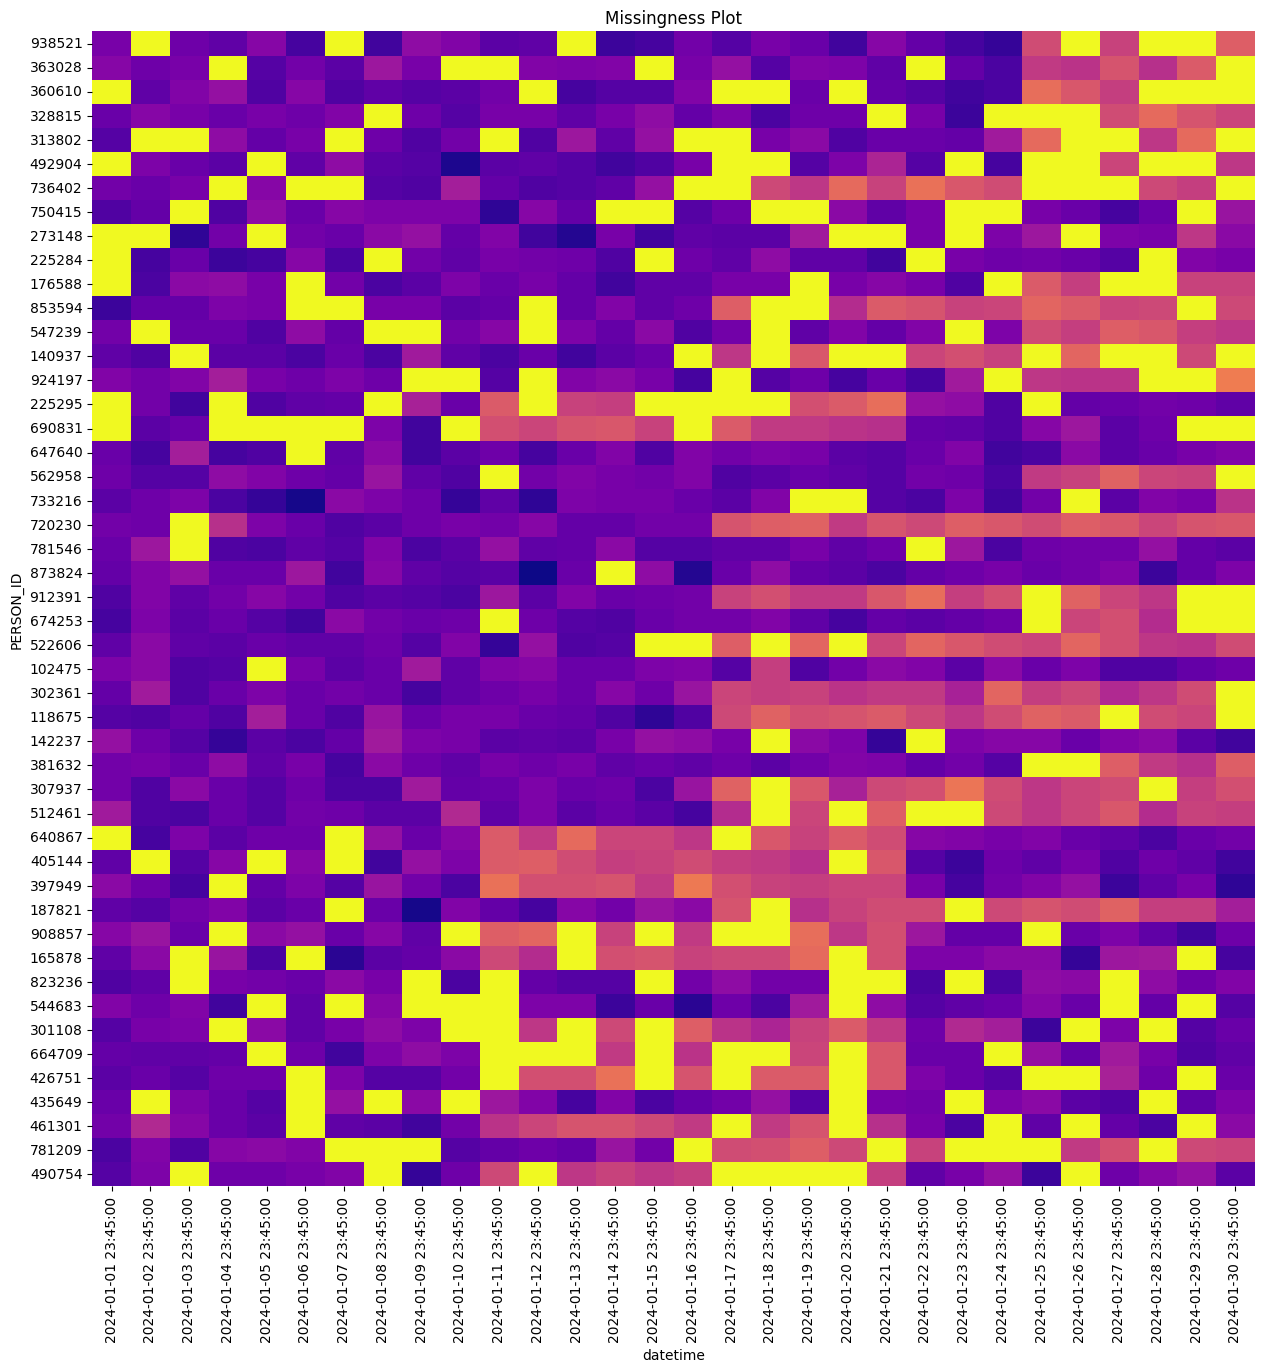

In [9]:
DTWkmeans = Cluster_DTW_KMeans(n_clusters=optimal_k)
DTWkmeans.fit(my_missing_data_matrix)
DTWclusters = DTWkmeans.labels_

plot_data = MissingPatternPlot.initialize(my_missing_data_matrix, None, 'study_period', DTWclusters)
plot_data.plot('cluster', direction=False, y_label='PERSON_ID', y_ticks=True)